In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
relationship_mtx = pd.read_csv('../data/raw/Wedding Guest Network Data - Connection Matrix.csv', index_col=0)
constraint_mtx = pd.read_csv('../data/raw/Wedding Guest Network Data - Seating Constraints.csv', index_col=0)
guest_list_df = pd.read_csv('../data/raw/Wedding Guest Network Data - Guest List.csv', index_col=0)

In [3]:
relationship_mtx

,Richard Pattison,Kathryn Russell,Tim Balzer,Mac Pattison,Ali Pattison,Ella Pattison,Mary Pattison,William Pattison,Wally Pattison,Holly Pattison,...,Alice McIntosh,Daniel Cohen,Sean Martin,Nefeli Chondrogianni,Sean Neel,Jenny Falberg,Pat Jr. Pattison,Morgan Pattison,MC Davault,Ryan Hurley
Richard Pattison,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1.0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0,1.0
Kathryn Russell,3.0,NaN,3.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,2.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,3.0,1.0
Tim Balzer,3.0,3.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,2.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,3.0,1.0
Mac Pattison,3.0,0.0,0.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
Ali Pattison,3.0,0.0,0.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jenny Falberg,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,NaN,0.0,0.0,0.0,0.0
Pat Jr. Pattison,3.0,0.0,0.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,0.0,0.0
Morgan Pattison,2.0,0.0,0.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,0.0,0.0
MC Davault,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [4]:
constraint_mtx.fillna(0, inplace=True)

In [5]:
all(constraint_mtx.columns == relationship_mtx.columns) and all(constraint_mtx.index == relationship_mtx.index) and all(constraint_mtx.index == constraint_mtx.columns)

True

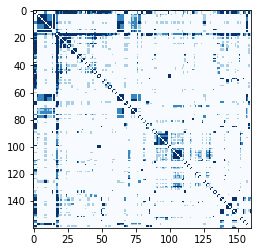

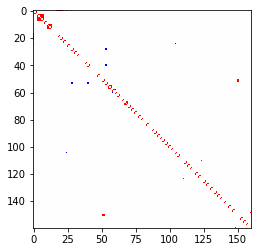

In [6]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.imshow(relationship_mtx.values, cmap='Blues', interpolation='nearest')
plt.show()

plt.imshow(constraint_mtx.values, cmap='bwr', interpolation='nearest')
plt.show()

In [7]:
relationship_mtx.sum(axis=0).sort_values(ascending=False)[:50]

Mary Balzer            339.0
Richard Pattison       274.0
Max Balzer             219.0
Kathryn Russell        215.0
Tim Balzer             203.0
Holly Pattison         121.0
Wally Pattison         115.0
Genevieve Geoghan      102.0
Mac Pattison            84.0
Maggie Dunn             79.0
Mary Grace Pattison     76.0
Oscar Nordness          70.0
Pat Jr. Pattison        70.0
Pat Pattison            68.0
Marie Pattison          68.0
James Rogers            66.0
Ali Pattison            64.0
Suzie Campen            63.0
Tim Campen              63.0
Molly Bammerlin         61.0
William Pattison        61.0
Mary Pattison           61.0
Ella Pattison           61.0
Sloane Fowkes           60.0
Judy Bell               60.0
Cody Vild               60.0
Daryl Bammerlin         60.0
Morgan Pattison         60.0
Christie Ranges         59.0
Harper Bammerlin        58.0
Olivia Bammerlin        58.0
Debbie Roper            57.0
Angelo Morales          56.0
Bonnie Neel             56.0
Murd Neel     

In [8]:
relationship_mtx.sum(axis=0).sort_values(ascending=False)[-50:]

Jacques Sisteron        26.0
Troy Nguyen             26.0
Natalie Kanshanchi      26.0
Ellen Ahlgren           26.0
Jake Bottiglieri        26.0
Toni Hepburn            26.0
Sam Ingraffia           26.0
Andres Cifuentes        26.0
Kaitlin Olson           25.0
Cameron Berkowitz       25.0
Jeff Thompson           25.0
Erik Ahlgren            25.0
Sam Waring              24.0
Anneli Ahlgren          24.0
Johan Ahlgren           24.0
Maggie McGinley         24.0
Claire Meunier          24.0
Hamideh Soltanzadeh     23.0
Charlie Coolidge        22.0
Sam Nicholson           22.0
Jukka Aromaa            21.0
Jenny Falberg           21.0
Paul Davault            21.0
Cara Touretzky          21.0
Daniel Cohen            20.0
Bob Olson               20.0
Ryan Hurley             20.0
Tori Iannuzzi           20.0
John Mazza              19.0
Kendra Ruth             19.0
Molly Hamrick           18.0
Aaron Hoogstraten       17.0
Mallory Chandler        16.0
Megan Kesselman         15.0
Caroline Cooli

In [9]:
guest_list = relationship_mtx.index.values.tolist()

In [10]:
len(guest_list)

160

In [11]:
graph = nx.Graph(name="Wedding Guest Network")
graph.add_nodes_from(guest_list)

In [12]:
edges = []
for i, g in enumerate(guest_list):
    for gp in guest_list[i+1:]:
        w = relationship_mtx.loc[g, gp]
        if w != 0:
            edges.append((g, gp, w))

In [13]:
len(edges)

1898

In [14]:
graph.add_weighted_edges_from(edges, weight='relationship_strength')

In [15]:
between_centrality = nx.betweenness_centrality(graph, weight='relationship_strength')
clusters = nx.clustering(graph, weight='relationship_strength')
centrality = nx.eigenvector_centrality(graph, weight='relationship_strength')

In [16]:
df_analysis = pd.concat((pd.Series(between_centrality).sort_index(), pd.Series(clusters).sort_index(), pd.Series(centrality).sort_index()), axis=1, keys=['between_centrality', 'clusters', 'centrality'])
centrality_ordered = df_analysis.sort_values('centrality').index
between_centrality_ordered = df_analysis.sort_values('between_centrality').index

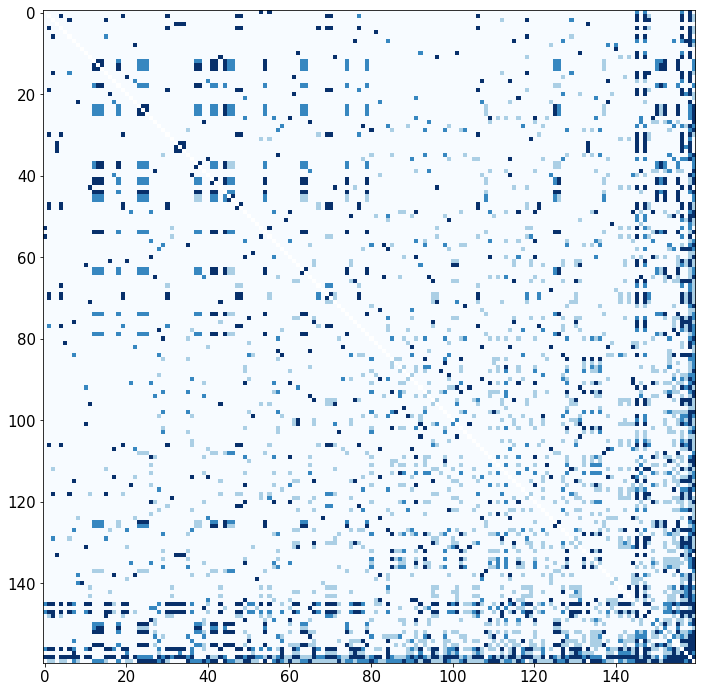

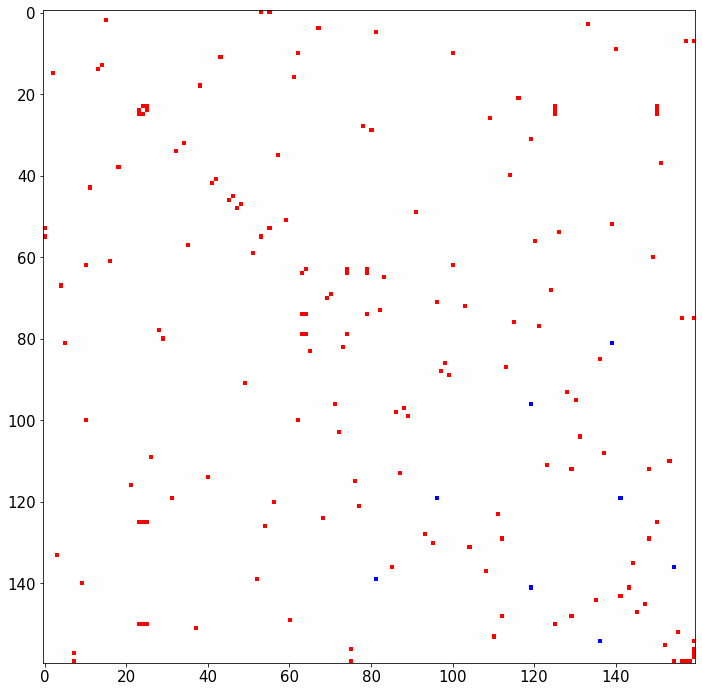

In [17]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.imshow(relationship_mtx.loc[between_centrality_ordered, between_centrality_ordered].values, cmap='Blues', interpolation='nearest')
plt.show()

plt.imshow(constraint_mtx.loc[between_centrality_ordered, between_centrality_ordered].values, cmap='bwr', interpolation='nearest')
plt.show()

In [18]:
guest_list_df.index = guest_list

In [19]:
guest_list_df

,Last Name,Party,Phone,Email,age,relationship,Street Address 1,Street Address 2,City,State/Province,...,Wedding Ceremony and Reception - RSVP,Wedding Ceremony and Reception - Do you require a vegetarian dinner,Wedding Ceremony and Reception - Please let us know of any food allergies,Wedding Ceremony and Reception - Thank You Sent,Wedding Ceremony and Reception - Gift Received,Send a note to the couple?,Unnamed: 23,Unnamed: 24,Pattison Family,22
Richard Pattison,Pattison,Richard Pattison,4408212849,mary.a.balzer@gmail.com,34,Pattison Family,"1236 N Flores St,",401,W Hollywood,CA,...,Attending,NaN,NaN,Not Sent,NaN,NaN,NaN,NaN,Pattison Family Friend,4.0
Kathryn Russell,Russell,Kathryn Russell & Tim Balzer,323-829-4040,kathrynrussellbalzer@gmail.com,68,Balzer Family,6734 Wedgewood Place,NaN,Los Angeles,CA,...,Attending,no,NaN,Not Sent,NaN,Can't wait!!,NaN,NaN,RRSD,0.0
Tim Balzer,Balzer,Kathryn Russell & Tim Balzer,NaN,NaN,69,Balzer Family,6734 Wedgewood Place,NaN,Los Angeles,CA,...,Attending,no,NaN,Not Sent,NaN,NaN,NaN,NaN,CMU,24.0
Mac Pattison,Pattison,Pattison Family,4124002585,Mac.Pattison@gmail.com,36,Pattison Family,3800 Fallwood Lane,NaN,Fredericksburg,VA,...,Attending,no,NaN,Not Sent,NaN,Can‚Äôt wait!!,NaN,NaN,UT,7.0
Ali Pattison,Pattison,Pattison Family,NaN,NaN,40,Pattison Family,3800 Fallwood Lane,NaN,Fredericksburg,VA,...,Attending,no,NaN,Not Sent,NaN,NaN,NaN,NaN,Richard Professional,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jenny Falberg,Falberg,Sean Neel & Jenny Falberg,NaN,NaN,53,Balzer Family,NaN,NaN,NaN,NaN,...,No Response,NaN,NaN,Not Sent,NaN,NaN,NaN,NaN,NaN,NaN
Pat Jr. Pattison,Pattison,NaN,NaN,NaN,43,Pattison Family,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Morgan Pattison,Pattison,NaN,NaN,NaN,46,Pattison Family,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MC Davault,Davault,NaN,NaN,NaN,70,Balzer Family,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
category_map = {
    'Balzer Family': "Bride's Family",
    'Balzer Family Friend': "Bride's Family Friends",
    'CMU': "Tartans",
    'IHHS': "Pandas and Vikings",
    'Mary Professional': "Bride's Friend from Work",
    'Other': "Friends Met in the Wild",
    'PU': "Tigers",
    'Pattison Family': "Groom's Family",
    'Pattison Family Friend': "Groom's Family Friends",
    'RRSD': "Pirates",
    'Richard Professional': "Groom's Friends from Work",
    'UCLA': "Bruins",
    'UT': "Longhorns"
 }

In [21]:
guest_list_df['relationship'] = guest_list_df['relationship'].map(category_map)

In [22]:
guest_list_df.loc['Richard Pattison', 'relationship'] = 'Groom'
guest_list_df.loc['Mary Balzer', 'relationship'] = 'Bride'

In [23]:
category_map = {
    "Bride's Family": ('darkseagreen', 'black'),
    "Bride's Family Friends": ('seagreen', 'white'),
    "Tartans": ('rgb(137, 7, 4)', 'white'),
    "Pandas and Vikings": ('rgb(0, 0, 100)', 'white'),
    "Bride's Friend from Work": ('rgb(240, 30, 200)', 'black'),
    "Friends Met in the Wild": ('rgb(31, 104, 152)', 'white'),
    "Tigers": ('rgb(255, 94, 0)', 'black'),
    "Groom's Family": ('rgb(125, 65, 223)', 'white'),
    "Groom's Family Friends": ('rgb(170, 109, 185)', 'white'),
    "Pirates": ('crimson', 'white'),
    "Groom's Friends from Work": ('rgb(255, 210, 50)', 'black'),
    "Bruins": ('rgb(49, 100, 255)', 'white'),
    "Longhorns": ('rgb(228, 137, 0)', 'white'),
    "Groom": ('black', 'black'),
    "Bride": ('white', 'white')
 }

In [24]:
import plotly.graph_objects as go

In [25]:
pos_spring = nx.spring_layout(graph, weight='relationship_strength', k=None, seed=13, iterations=200) #13 works best thus far
# pos = nx.circular_layout(graph)
# pos = nx.shell_layout(graph)
# pos = nx.spectral_layout(graph)
pos_kamada = nx.kamada_kawai_layout(graph, )

In [26]:
# Specific for random seed 13
# pos_spring['Richard Pattison'][0] -= 0.04
# pos_spring['Mary Balzer'][0] -= 0.04

In [27]:
x_sorted = sorted(np.asarray([p.tolist() for p in pos_spring.values()])[:, 0])
y_sorted = sorted(np.asarray([p.tolist() for p in pos_spring.values()])[:, 1])

position = 3
xmin, xmax = x_sorted[position], x_sorted[-position]
ymin, ymax = y_sorted[position], y_sorted[-position]

In [28]:
for node in graph.nodes():
    pos_spring[node][0] = np.maximum(xmin, np.minimum(xmax, pos_spring[node][0]))
    pos_spring[node][1] = np.maximum(ymin, np.minimum(ymax, pos_spring[node][1]))
    

In [29]:
def dist(A, B):
    return np.linalg.norm(np.array(A)-np.array(B))
    
def get_mid_coord(A, B, f=0.02):
    x0, y0 = A
    x1, y1 = B
    r = dist(A, B)
    slope = - 1 / ((y1 - y0) / (x1 - x0))
    x_mid = (x0 + x1) / 2
    y_mid = (y0 + y1) / 2
    if f > 0:
        x_p = x_mid + np.sqrt(r * f / (1 + slope ** 2))
    else:
        x_p = x_mid - np.sqrt(-r * f / (1 + slope ** 2))
        
    y_p = y_mid + slope * (x_p - x_mid)
    return x_p, y_p

In [30]:
node_distances = pd.DataFrame(0, columns=guest_list, index=guest_list)
for g in guest_list:
    for gp in guest_list:
        node_distances.loc[g, gp] = np.sqrt(dist(pos_spring[g], pos_spring[gp]))

In [31]:
node_distances

,Richard Pattison,Kathryn Russell,Tim Balzer,Mac Pattison,Ali Pattison,Ella Pattison,Mary Pattison,William Pattison,Wally Pattison,Holly Pattison,...,Alice McIntosh,Daniel Cohen,Sean Martin,Nefeli Chondrogianni,Sean Neel,Jenny Falberg,Pat Jr. Pattison,Morgan Pattison,MC Davault,Ryan Hurley
Richard Pattison,0.000000,0.624062,0.625638,0.553364,0.580023,0.595641,0.600261,0.617781,0.488690,0.466470,...,0.629077,0.787231,0.576536,0.650294,0.733813,0.800296,0.637189,0.641175,0.769755,0.845780
Kathryn Russell,0.624062,0.000000,0.063215,0.797770,0.803501,0.779287,0.794324,0.784325,0.737043,0.718135,...,0.549644,0.625327,0.848329,0.899294,0.462988,0.569994,0.842705,0.815599,0.451956,0.607261
Tim Balzer,0.625638,0.063215,0.000000,0.798140,0.803688,0.779108,0.794243,0.784006,0.737353,0.718459,...,0.547356,0.627614,0.849629,0.900568,0.464985,0.571410,0.842790,0.815368,0.449320,0.607820
Mac Pattison,0.553364,0.797770,0.798140,0.000000,0.218104,0.372371,0.338255,0.414997,0.308805,0.349487,...,0.697483,0.960482,0.552532,0.609995,0.905808,0.963515,0.324851,0.400233,0.906428,0.996985
Ali Pattison,0.580023,0.803501,0.803688,0.218104,0.000000,0.314411,0.265124,0.360790,0.323872,0.363277,...,0.688301,0.972907,0.593272,0.645317,0.914449,0.972336,0.264335,0.336085,0.908187,1.003874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jenny Falberg,0.800296,0.569994,0.571410,0.963515,0.972336,0.959249,0.969941,0.965204,0.916865,0.901924,...,0.788135,0.389370,0.968179,1.008559,0.334339,0.000000,1.006595,0.989654,0.534869,0.308985
Pat Jr. Pattison,0.637189,0.842705,0.842790,0.324851,0.264335,0.352455,0.302351,0.377961,0.416916,0.447616,...,0.722299,1.008038,0.623126,0.664688,0.950566,1.006595,0.000000,0.316560,0.940847,1.036418
Morgan Pattison,0.641175,0.815599,0.815368,0.400233,0.336085,0.244821,0.229951,0.232103,0.417995,0.439964,...,0.667952,0.998457,0.681807,0.726275,0.931739,0.989654,0.316560,0.000000,0.909596,1.016575
MC Davault,0.769755,0.451956,0.449320,0.906428,0.908187,0.879163,0.894525,0.880115,0.852393,0.836358,...,0.634987,0.645725,0.961053,1.006425,0.471430,0.534869,0.940847,0.909596,0.000000,0.521217


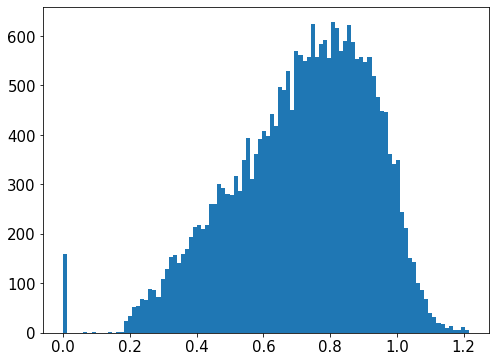

In [32]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 15
plt.hist(np.reshape(node_distances.values, (-1, 1)), bins=100)
plt.show()

In [33]:
def reposition(pt0, pt1, add=0.03):
    x0, y0 = pt0
    x1, y1 = pt1
    sign = 1 if x0 < x1 else -1
    
    slope = (y1 - y0) / (x1 - x0)
    angle = np.tanh(slope)
    dx1, dy1 = sign * 0.5 * add * np.array([np.cos(angle), np.sin(angle)])
    dx0, dy0 = - sign * 0.5 * add * np.array([np.cos(angle), np.sin(angle)])
    
    x0 += dx0
    y0 += dy0
    x1 += dx1
    y1 += dy1

    return (x0, y0), (x1, y1)

In [34]:
edge_traces = []
edge_info = []
for edge in graph.edges():
    
    x0, y0 = pos_spring[edge[0]]
    x1, y1 = pos_spring[edge[1]]
    if node_distances.loc[edge[0], edge[1]] < 0.12:
        print(edge[0])
        print(edge[1])
        (x0, y0), (x1, y1) = reposition((x0, y0), (x1, y1))
        pos_spring[edge[0]] = x0, y0
        pos_spring[edge[1]] = x1, y1
        node_distances.loc[edge[0], edge[1]] = np.sqrt(dist(pos_spring[edge[0]], pos_spring[edge[1]]))
        node_distances.loc[edge[1], edge[0]] = np.sqrt(dist(pos_spring[edge[1]], pos_spring[edge[0]]))


for edge in graph.edges():

    x0, y0 = pos_spring[edge[0]]
    x1, y1 = pos_spring[edge[1]]

    weight = graph.get_edge_data(edge[0], edge[1])['relationship_strength']

    f_scale = 0.0
    f = f_scale if np.random.randint(2) else -f_scale

    x_p, y_p = get_mid_coord([x0, y0], [x1, y1], f)
    
    edge_traces += [go.Scatter(
        x=[x0, x_p, x1], y=[y0, y_p, y1],
        line=dict(width=weight/3.5, color='black', shape='spline'),
        mode='lines',
        showlegend=False,
        hoverinfo='none')]

    edge_info += [go.Scatter(
        x=[x_p], y=[y_p],
        mode='markers',
        marker=dict( size=0.1,  color='black'),
        text=[f'{edge[0]} <--> {edge[1]} <br> Weight: {int(weight)}'],
        hoverinfo='text',
        showlegend=False)]

Kathryn Russell
Tim Balzer
Sara Forsyth
John Forsyth


/Users/richardpattison/anaconda3/envs/wedding_prep/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/richardpattison/anaconda3/envs/wedding_prep/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  


In [35]:


node_traces = []
display_name_traces = []
for cat, (color, text_color) in category_map.items():
    size = 37 if cat not in ['Bride', 'Groom'] else 75
    text_size = 18 if cat not in ['Bride', 'Groom'] else 36
    node_names = []
    display_names = []
    node_x = []
    node_y = []
    for node in graph.nodes():
        if guest_list_df.loc[node, 'relationship'] != cat:
            continue

        x, y = pos_spring[node]
        node_x.append(x)
        node_y.append(y)
        node_names.append(node)
        display_names.append(node.split(' ')[0][0] + node.split(' ')[1][0])

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        text=[f"{n} <br> {cat}" for n in node_names],
        mode='markers',
        hoverinfo='text',
        name=cat,
        marker=dict(
            color=color,
            size=size,
            line_width=0.0))

    display_name_trace = go.Scatter(
        x=node_x, y=node_y,
        text=display_names,
        textfont=dict(
            color=text_color,
            size=text_size),
        mode='text',
        hoverinfo='none',
        name=None,
        marker=None,
        showlegend=False)

    node_traces.append(node_trace)
    display_name_traces.append(display_name_trace)


In [36]:
fig = go.Figure(data=edge_traces + node_traces + display_name_traces,
                layout=go.Layout(
                    title=None,#"Mary and Richard's wedding guest network",
                    titlefont_size=24,
                    width=2000,
                    height=2000,
                    showlegend=True,
                    hovermode='closest',
                    margin=dict(b=20,l=20,r=20,t=20),
                    legend=dict(
                        yanchor="bottom", 
                        y=1.02, 
                        xanchor="left", 
                        x=0,
                        orientation="v",
                        font=dict(
                            size=15,
                            color="black")),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    dragmode='pan')
                    )
fig.add_annotation(
    text="Note: Exact node positions are determined stochastically, <br>but represent the relative strength of the node's relationship <br>to the various cluster centers", 
    align='left',
    showarrow=False,
    xref='paper',
    yref='paper',
    x=0.15,
    y=1.06,
    font=dict(
        size=15,
        color="black"))
fig.show()

In [37]:
fig.write_html('../../wedding_network_model.html')

In [38]:
fig = go.Figure(data=edge_traces + node_traces + display_name_traces,
                layout=go.Layout(
                    title=None,#"Mary and Richard's wedding guest network",
                    titlefont_size=24,
                    width=2000,
                    height=2000,
                    showlegend=True,
                    hovermode='closest',
                    margin=dict(b=20,l=20,r=5,t=20),
                    legend=dict(
                        yanchor="bottom", 
                        y=0.8, 
                        xanchor="right", 
                        x=0,
                        orientation="v",
                        font=dict(
                            size=15,
                            color="black")),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    dragmode='pan')
                    )
fig.show()

In [39]:
fig.write_html('../../wedding_network_model_desktop.html')